In [1]:
import pandas as pd
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

%matplotlib inline 

In [2]:
data_germany=pd.read_excel('Website Research on Europe.xlsx', sheet_name='Germany')


In [3]:
data_poland=pd.read_excel('Website Research on Europe.xlsx', sheet_name='Poland')


In [4]:
data_uk=pd.read_excel('Website Research on Europe.xlsx', sheet_name='United Kingdom')


In [5]:
data_bel=pd.read_excel('Website Research on Europe.xlsx', sheet_name='Belgium')


In [6]:
data_nl=pd.read_excel('Website Research on Europe.xlsx', sheet_name='Netherlands')

In [7]:
data_rom=pd.read_excel('Website Research on Europe.xlsx', sheet_name='Romania')


In [8]:
data_switz=pd.read_excel('Website Research on Europe.xlsx', sheet_name='Switzerland')
data_swe=pd.read_excel('Website Research on Europe.xlsx', sheet_name='Sweden')

In [9]:
merged_df = pd.concat([data_germany, data_poland, data_uk, data_bel, data_nl, data_rom, data_switz, data_swe])


In [10]:
merged_df.head(10)

,Link,Company Name,Category,First Name,Last Name,Title,Linkedin Profile,Email,Phone Number,Country,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,NaN,NaN,NaN,NaN,NaN,NaN
1,ubuy.co.de,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,NaN,NaN,NaN,NaN,NaN,NaN
2,flagma.de,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,NaN,NaN,NaN,NaN,NaN,NaN
3,o2online.de,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,NaN,NaN,NaN,NaN,NaN,NaN
4,cleverbuy.de,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,NaN,NaN,NaN,NaN,NaN,NaN
5,smartcellular.de,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,,NaN,NaN,NaN,NaN,NaN
6,gravis.de,GRAVIS Computervertriebsgesellschaft,NaN,Lars,Broschk \n,Online Marketing Manager,https://www.linkedin.com/sales/people/ACwAACyC...,lars.broschk@gravis.de,NaN,Germany,NaN,NaN,NaN,NaN,NaN,NaN
7,expert.de,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,NaN,NaN,NaN,NaN,NaN,NaN
8,notebooksbilliger.de,notebooksbilliger.de,NaN,Zoltan,Maklary\n,Director Marketing,https://www.linkedin.com/sales/people/ACwAAAl1...,zmaklary@notebooksbilliger.de,NaN,Germany,NaN,NaN,NaN,NaN,NaN,NaN
9,notebooksbilliger.de,notebooksbilliger.de,NaN,Jutta,Singer,Senior Online Marketing Manager,https://www.linkedin.com/sales/people/ACwAAAO6...,jsinger@notebooksbilliger.de,NaN,Germany,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
merged_df=merged_df.drop(columns=['Linkedin Profile ','Email','Phone Number', 'Category', 'First Name', 'Last Name','Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15'])


In [12]:
merged_df=merged_df.dropna()

In [13]:
merged_df=merged_df.sort_values('Country', ascending=True)

In [14]:
merged_df['Country'].value_counts() #how many companies in each country

Poland         55
UK             53
Belgium        53
Switzerland    45
Sweden         40
Netherlands    36
Romania        34
Germany        11
Name: Country, dtype: int64

In [15]:
merged_df['Title '].value_counts()

Marketing Manager                  23
Marketing Director                  9
Marketing Manager                   8
Chief Marketing Officer             8
CEO                                 6
                                   ..
Brand & Marketing Manager           1
Manager in- en verkoop              1
Sales Specialist                    1
Director of Marketing and Sales     1
Kommunikationsleiter                1
Name: Title , Length: 235, dtype: int64

In [16]:
merged_df['Title '].describe()

count                   327
unique                  235
top       Marketing Manager
freq                     23
Name: Title , dtype: object

In [17]:
titles = merged_df["Title "]
titles.tolist()

['Business Office Manager',
 'Sales Manager Alternate International ',
 'Team Leader Online Marketing',
 'Team Leader Online Marketing',
 'Online Category & Marketing Coördinator',
 'Marketing manager ',
 'CRM & Marketing Automation Specialist',
 'Digital Marketing & Ecommerce Manager',
 'Chief Marketing and Digital Officer ',
 'Marketplace Product Manager',
 'Marketing Executive',
 'Marketing & Communication Manager',
 'Owner ',
 'Business IT Consultant ',
 'Marketing Manager',
 'Executive Marketing Manager',
 'Sales Specialist',
 'Sales Advisor',
 'CEO ',
 'Marketing Officer',
 'Senior Sales Advisor',
 'Director Product Marketing BASE',
 'Head of Digital Communication',
 'Chief Technology Officer',
 'Head of marketing\n',
 'Head of Digital IT',
 'Marketing and Communication Manager',
 'Regional Sales Manager',
 'Owner',
 '\nExpert International E-Commerce',
 'Sales and Formule Manager',
 'Betermaker ',
 'Founder & CEO',
 'CEO ',
 'Marketing support',
 'Digital Marketing Specialist',


In [18]:
category={'Marketing Manager':0, 'Marketing Analyst': 0, 'Marketing Specialist': 0, 'Chief Marketing Officer':0, 'Director': 0, 'Sales':0, 'Other':0}
import re
for role in merged_df['Title ']:
    if re.search (r'\bManager\b', role):
        category['Marketing Manager'] += 1
    elif re.search (r'\bSpecialist\b', role):
        category['Marketing Specialist'] += 1
    elif re.search(r'\b[Aa]nalyst\b', role):
        category['Marketing Analyst'] += 1
    elif re.search(r'\b[Cc]hief Marketing Officer\b', role):
        category['Chief Marketing Officer'] += 1
    elif re.search(r'\b[Dd]irector\b', role):
        category['Director'] += 1
    elif re.search(r'\b[Ss]ales\b', role):
        category['Sales'] += 1
    else:
        category['Other'] += 1 #Other includes e-commerce
    
roles_category=pd.DataFrame.from_dict(data=category, orient ='index')
roles_category.rename(columns={0:'Total'}, inplace=True)
roles_category

,Total
Marketing Manager,126
Marketing Analyst,3
Marketing Specialist,19
Chief Marketing Officer,11
Director,32
Sales,17
Other,119


(0.0, 150.0)

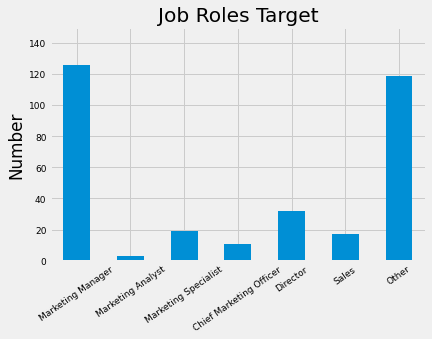

In [19]:
plt.style.use('fivethirtyeight')
roles_category['Total'].plot.bar(rot=35, fontsize=9)
plt.title('Job Roles Target')
plt.ylabel('Number')
plt.ylim(0,150)

In [20]:
count_role = merged_df['Title '].value_counts(normalize=True)
popular_role = count_role[count_role>.01].index
print(popular_role)

Index(['Marketing Manager', 'Marketing Director', 'Marketing Manager ',
       'Chief Marketing Officer', 'CEO ', 'Owner ', 'Marketing Specialist',
       'Head of Marketing', 'Senior Marketing Manager'],
      dtype='object')


In [23]:
Belgium_role = merged_df[merged_df['Country']=='Belgium']


In [24]:
category={'Marketing Manager':0, 'Marketing Analyst': 0, 'Marketing Specialist': 0, 'Chief Marketing Officer':0, 'Director': 0, 'Sales':0, 'Other':0}
import re
for role in Belgium_role['Title ']:
    if re.search (r'\b[Mm]anager\b', role):
        category['Marketing Manager'] += 1
    elif re.search (r'\b[Ss]pecialist\b', role):
        category['Marketing Specialist'] += 1
    elif re.search(r'\b[Aa]nalyst\b', role):
        category['Marketing Analyst'] += 1
    elif re.search(r'\b[Cc]hief Marketing Officer\b', role):
        category['Chief Marketing Officer'] += 1
    elif re.search(r'\b[Dd]irector\b', role):
        category['Director'] += 1
    elif re.search(r'\b[Ss]ales\b', role):
        category['Sales'] += 1
    else:
        category['Other'] += 1 #Other includes e-commerce, founder, ceo
role_by_bel=pd.DataFrame.from_dict(data=category, orient ='index')
role_by_bel.index.name = 'Title'
role_by_bel.rename(columns={0:'Total'}, inplace=True)


In [25]:
ger_role = merged_df[merged_df['Country']=='Germany']
category={'Marketing Manager':0, 'Marketing Analyst': 0, 'Marketing Specialist': 0, 'Chief Marketing Officer':0, 'Director': 0, 'Sales':0, 'Other':0}
import re
for role in ger_role['Title ']:
    if re.search (r'\b[Mm]anager\b', role):
        category['Marketing Manager'] += 1
    elif re.search (r'\b[Mm]arketing Specialist\b', role):
        category['Marketing Specialist'] += 1
    elif re.search(r'\b[Aa]nalyst\b', role):
        category['Marketing Analyst'] += 1
    elif re.search(r'\b[Cc]hief Marketing Officer\b', role):
        category['Chief Marketing Officer'] += 1
    elif re.search(r'\b[Dd]irector\b', role):
        category['Director'] += 1
    elif re.search(r'\b[Ss]ales\b', role):
        category['Sales'] += 1
    else:
        category['Other'] += 1 #Other includes e-commerce
role_by_ger=pd.DataFrame.from_dict(data=category, orient ='index')
role_by_ger.rename(columns={0:'Total'}, inplace=True)
role_by_ger.index.name = 'Title'


In [26]:
pol_role = merged_df[merged_df['Country']=='Poland']
category={'Marketing Manager':0, 'Marketing Analyst': 0, 'Marketing Specialist': 0, 'Chief Marketing Officer':0, 'Director': 0, 'Sales':0, 'Other':0}
import re
for role in pol_role['Title ']:
    if re.search (r'\b[Mm]anager\b', role):
        category['Marketing Manager'] += 1
    elif re.search (r'\b[Mm]arketing Specialist\b', role):
        category['Marketing Specialist'] += 1
    elif re.search(r'\b[Aa]nalyst\b', role):
        category['Marketing Analyst'] += 1
    elif re.search(r'\b[Cc]hief Marketing Officer\b', role):
        category['Chief Marketing Officer'] += 1
    elif re.search(r'\b[Dd]irector\b', role):
        category['Director'] += 1
    elif re.search(r'\b[Ss]ales\b', role):
        category['Sales'] += 1
    else:
        category['Other'] += 1 #Other includes e-commerce
role_by_pol=pd.DataFrame.from_dict(data=category, orient ='index')
role_by_pol.index.name = 'Title'
role_by_pol.rename(columns={0:'Total'}, inplace=True)


In [27]:
uk_role = merged_df[merged_df['Country']=='UK']
category={'Marketing Manager':0, 'Marketing Analyst': 0, 'Marketing Specialist': 0, 'Chief Marketing Officer':0, 'Director': 0, 'Sales':0, 'Other':0}
import re
for role in uk_role['Title ']:
    if re.search (r'\b[Mm]arketing Manager\b', role):
        category['Marketing Manager'] += 1
    elif re.search (r'\b[Mm]arketing Specialist\b', role):
        category['Marketing Specialist'] += 1
    elif re.search(r'\b[Aa]nalyst\b', role):
        category['Marketing Analyst'] += 1
    elif re.search(r'\b[Cc]hief Marketing Officer\b', role):
        category['Chief Marketing Officer'] += 1
    elif re.search(r'\b[Dd]irector\b', role):
        category['Director'] += 1
    elif re.search(r'\b[Ss]ales\b', role):
        category['Sales'] += 1
    else:
        category['Other'] += 1 #Other includes e-commerce
role_by_uk=pd.DataFrame.from_dict(data=category, orient ='index')
role_by_uk.index.name = 'Title'
role_by_uk.rename(columns={0:'Total'}, inplace=True)


In [28]:
nl_role = merged_df[merged_df['Country']=='Netherlands']
category={'Marketing Manager':0, 'Marketing Analyst': 0, 'Marketing Specialist': 0, 'Chief Marketing Officer':0, 'Director': 0, 'Sales':0, 'Other':0}
import re
for role in nl_role['Title ']:
    if re.search (r'\bManager\b', role):
        category['Marketing Manager'] += 1
    elif re.search (r'\b[Mm]arketing Specialist\b', role):
        category['Marketing Specialist'] += 1
    elif re.search(r'\b[Aa]nalyst\b', role):
        category['Marketing Analyst'] += 1
    elif re.search(r'\b[Cc]hief Marketing Officer\b', role):
        category['Chief Marketing Officer'] += 1
    elif re.search(r'\b[Dd]irector\b', role):
        category['Director'] += 1
    elif re.search(r'\b[Ss]ales\b', role):
        category['Sales'] += 1
    else:
        category['Other'] += 1 #Other includes e-commerce
role_by_nl=pd.DataFrame.from_dict(data=category, orient ='index')
role_by_nl.index.name = 'Title'
role_by_nl.rename(columns={0:'Total'}, inplace=True)


In [29]:
rm_role= merged_df[merged_df['Country']=='Romania']
category={'Marketing Manager':0, 'Marketing Analyst': 0, 'Marketing Specialist': 0, 'Chief Marketing Officer':0, 'Director': 0, 'Sales':0, 'Other':0}
import re
for role in rm_role['Title ']:
    if re.search (r'\bManager\b', role):
        category['Marketing Manager'] += 1
    elif re.search (r'\b[Mm]arketing Specialist\b', role):
        category['Marketing Specialist'] += 1
    elif re.search(r'\b[Aa]nalyst\b', role):
        category['Marketing Analyst'] += 1
    elif re.search(r'\b[Cc]hief Marketing Officer\b', role):
        category['Chief Marketing Officer'] += 1
    elif re.search(r'\b[Dd]irector\b', role):
        category['Director'] += 1
    elif re.search(r'\b[Ss]ales\b', role):
        category['Sales'] += 1
    else:
        category['Other'] += 1 #Other includes e-commerce
role_by_rm=pd.DataFrame.from_dict(data=category, orient ='index')
role_by_rm.index.name = 'Title'
role_by_rm.rename(columns={0:'Total'}, inplace=True)


In [30]:
swit_role= merged_df[merged_df['Country']=='Switzerland']
category={'Marketing Manager':0, 'Marketing Analyst': 0, 'Marketing Specialist': 0, 'Chief Marketing Officer':0, 'Director': 0, 'Sales':0, 'Other':0}
import re
for role in swit_role['Title ']:
    if re.search (r'\bManager\b', role):
        category['Marketing Manager'] += 1
    elif re.search (r'\b[Mm]arketing Specialist\b', role):
        category['Marketing Specialist'] += 1
    elif re.search(r'\b[Aa]nalyst\b', role):
        category['Marketing Analyst'] += 1
    elif re.search(r'\b[Cc]hief Marketing Officer\b', role):
        category['Chief Marketing Officer'] += 1
    elif re.search(r'\b[Dd]irector\b', role):
        category['Director'] += 1
    elif re.search(r'\b[Ss]ales\b', role):
        category['Sales'] += 1
    else:
        category['Other'] += 1 #Other includes e-commerce
role_by_swit=pd.DataFrame.from_dict(data=category, orient ='index')
role_by_swit.index.name = 'Title'
role_by_swit.rename(columns={0:'Total'}, inplace=True)


In [31]:
swe_role= merged_df[merged_df['Country']=='Sweden']
category={'Marketing Manager':0, 'Marketing Analyst': 0, 'Marketing Specialist': 0, 'Chief Marketing Officer':0, 'Director': 0, 'Sales':0, 'Other':0}
import re
for role in swe_role['Title ']:
    if re.search (r'\bManager\b', role):
        category['Marketing Manager'] += 1
    elif re.search (r'\b[Mm]arketing Specialist\b', role):
        category['Marketing Specialist'] += 1
    elif re.search(r'\b[Aa]nalyst\b', role):
        category['Marketing Analyst'] += 1
    elif re.search(r'\b[Cc]hief Marketing Officer\b', role):
        category['Chief Marketing Officer'] += 1
    elif re.search(r'\b[Dd]irector\b', role):
        category['Director'] += 1
    elif re.search(r'\b[Ss]ales\b', role):
        category['Sales'] += 1
    else:
        category['Other'] += 1 #Other includes e-commerce
role_by_swe=pd.DataFrame.from_dict(data=category, orient ='index')
role_by_swe.index.name = 'Title'
role_by_swe.rename(columns={0:'Total'}, inplace=True)


In [33]:
data_frames = [role_by_bel, role_by_ger, role_by_pol, role_by_uk, role_by_nl, role_by_rm, role_by_swit, role_by_swe]

In [34]:
from functools import reduce
new_df = reduce(lambda x,y: pd.merge(x,y, on='Title', how='outer'), [role_by_bel, role_by_ger, role_by_pol, role_by_uk, role_by_nl, role_by_rm, role_by_swit, role_by_swe])

In [35]:
new_df.columns = ['Belgium', 'Germany', 'Poland', 'UK', 'Netherlands', 'Romania', 'Switzerland', 'Sweden']
new_df

,Belgium,Germany,Poland,UK,Netherlands,Romania,Switzerland,Sweden
Title,,,,,,,,
Marketing Manager,20,3,18,14,14,17,14,20
Marketing Analyst,0,0,0,0,2,1,0,0
Marketing Specialist,3,1,5,0,1,1,2,0
Chief Marketing Officer,0,1,6,1,0,0,1,2
Director,1,2,12,5,2,3,4,3
Sales,3,0,3,5,4,5,0,3
Other,26,4,11,28,13,7,24,12


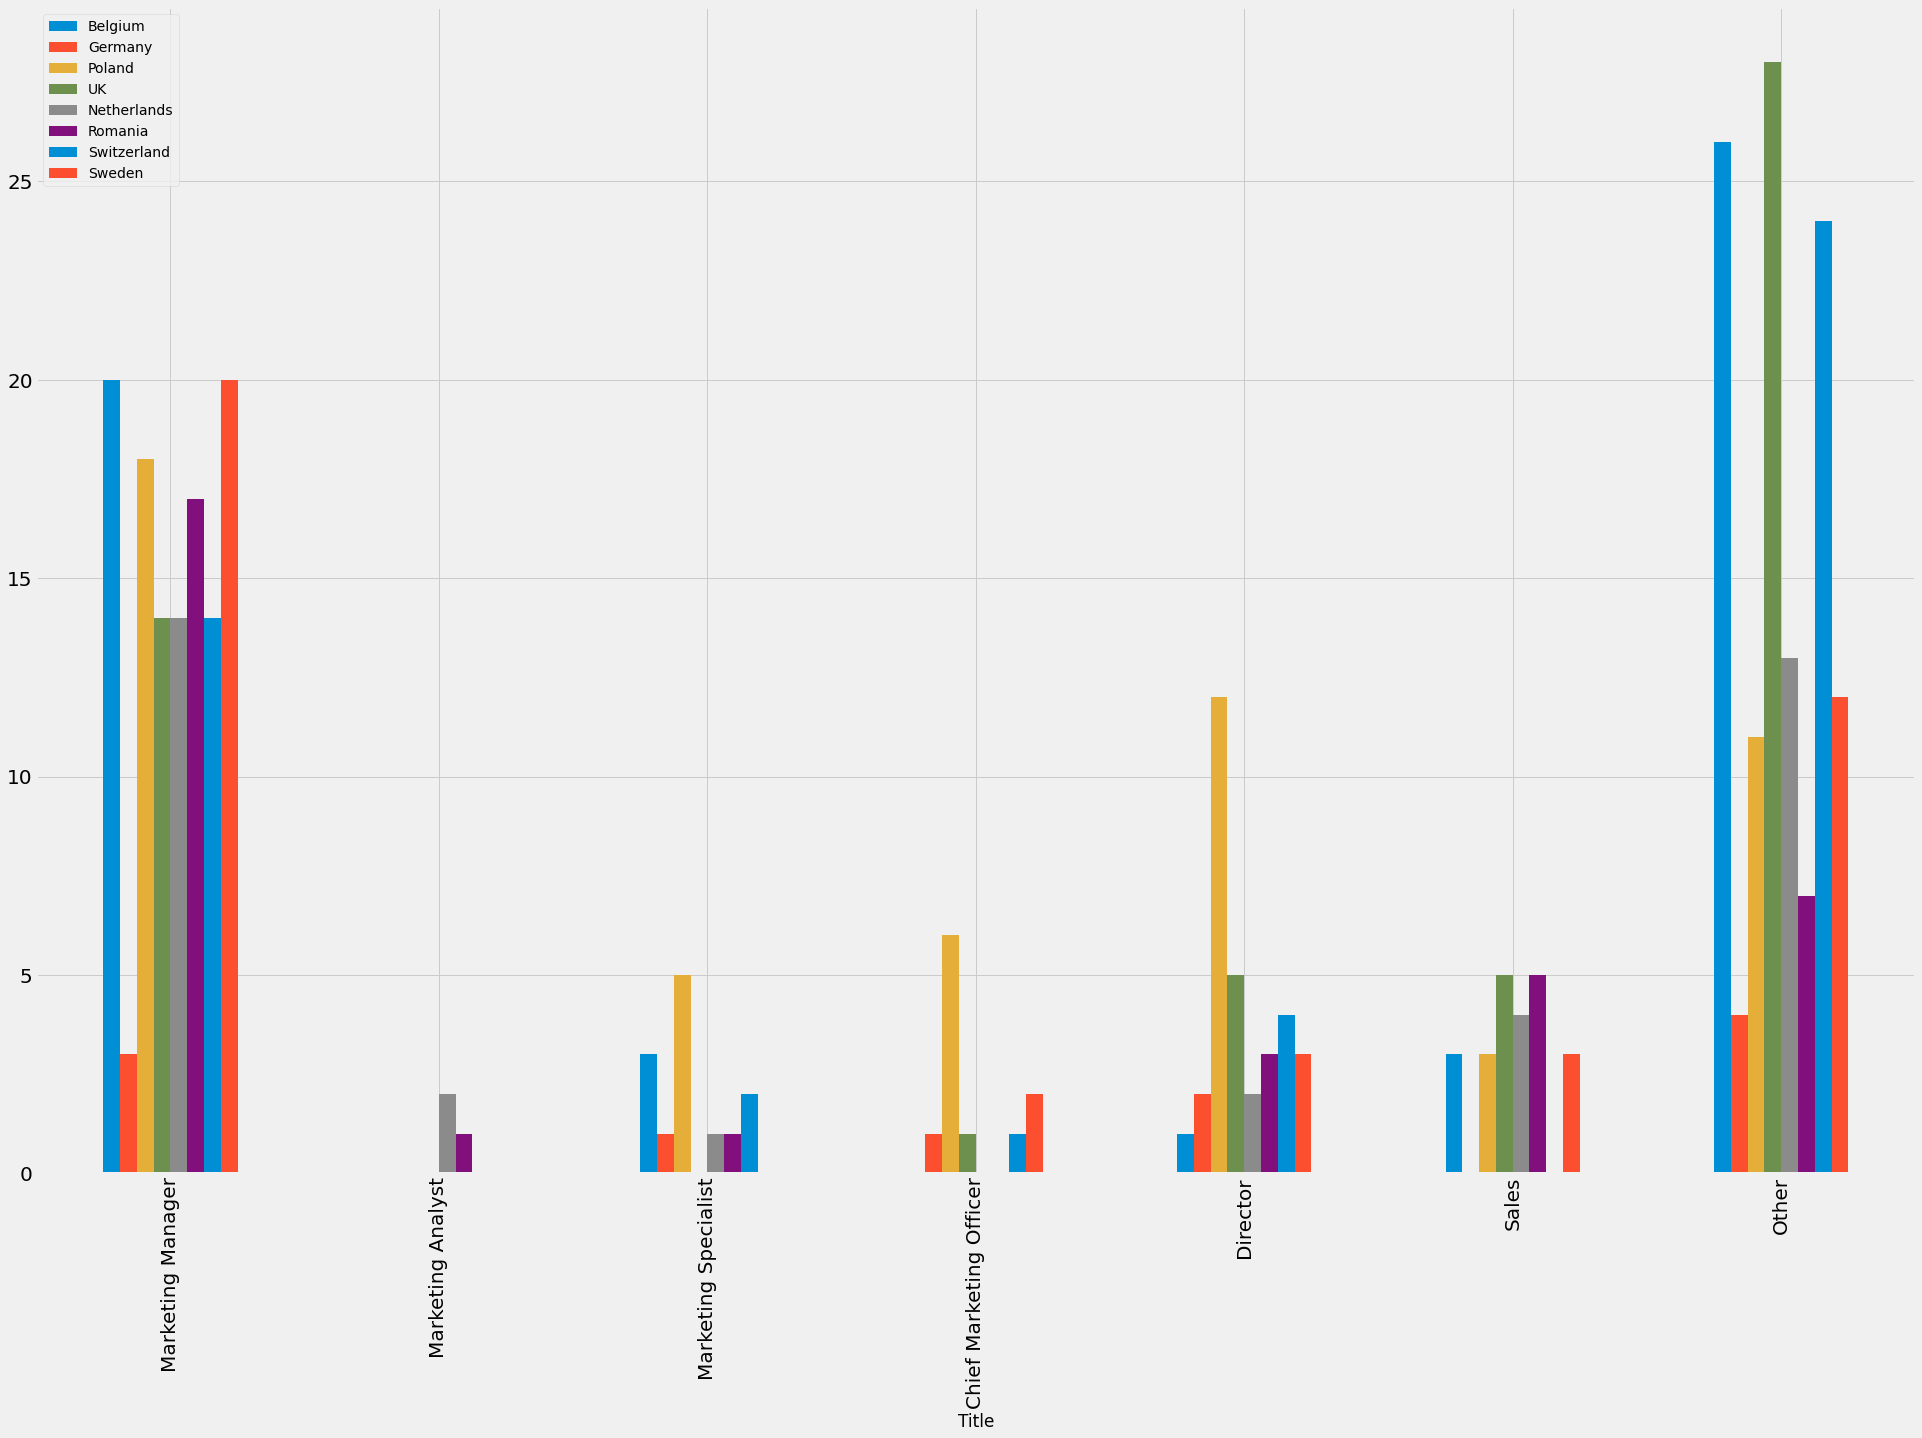

In [36]:
new_df.plot(kind="bar", figsize=(30,20), fontsize=20)